In [249]:
# # Install necessary libraries (checking condition whether it's installed)

# try:
#     import pandas as pd
# except ImportError:
#     !pip install pandas

# try:
#     import matplotlib.pyplot as plt
# except ImportError:
#     !pip install matplotlib

# # Load libraries

# import pandas as pd
# import matplotlib.pyplot as plt

In [250]:
import numpy as np
from scipy.stats import randint as discrete_uniform
import pandas as pd

# Define distributions
dist_high = discrete_uniform(low=500, high=1000)
dist_med = discrete_uniform(low=50, high=500)
dist_low = discrete_uniform(low=10, high=100)

# Probabilities
probs = [0.4, 0.3, 0.3]

# Parameters
n_appliances = 10
n_simulations = 1000

def generate_criticality(n_appliances):
    n_high = round(n_appliances * probs[0])
    n_med = round(n_appliances * probs[1])
    n_low = n_appliances - n_high - n_med

    high_criticality = dist_high.rvs(size=n_high)
    med_criticality = dist_med.rvs(size=n_med)
    low_criticality = dist_low.rvs(size=n_low)

    all_criticality = np.concatenate((high_criticality, med_criticality, low_criticality))
    labels = np.concatenate((["High"] * n_high, ["Medium"] * n_med, ["Low"] * n_low))
    return all_criticality, labels

# Run simulations and aggregate results
all_criticalities = []
all_labels = []

for _ in range(n_simulations):
    criticality, labels = generate_criticality(n_appliances)
    all_criticalities.append(criticality)
    all_labels.append(labels)

# Flatten the nested lists
all_criticalities = np.concatenate(all_criticalities)
all_labels = np.concatenate(all_labels)

# Select criticality values at simulation index 999, while python starts from zero
selected_simulation_criticality = all_criticalities[999*n_appliances: (999+1)*n_appliances] 

# Create DataFrame
df = pd.DataFrame({'Criticality': selected_simulation_criticality, 'Category': all_labels[999*n_appliances: (999+1)*n_appliances]}) 

# Print the selected criticality values and DataFrame
print("Criticality values for all appliances at simulation index 999:")
print(selected_simulation_criticality)
print("\nDataFrame:")
print(df)

Criticality values for all appliances at simulation index 999:
[770 537 957 611 486 300 214  66  14  75]

DataFrame:
   Criticality Category
0          770     High
1          537     High
2          957     High
3          611     High
4          486   Medium
5          300   Medium
6          214   Medium
7           66      Low
8           14      Low
9           75      Low


C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\777279713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Criticality', data=df, palette='Set1')


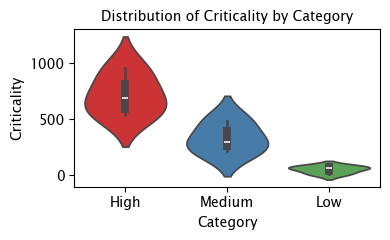

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(4, 2.5))  # Adjust figure size
sns.violinplot(x='Category', y='Criticality', data=df, palette='Set1')

#  font sizes for title, x-axis, and y-axis labels
plt.title('Distribution of Criticality by Category', fontsize=10)
plt.xlabel('Category', fontsize=10)  
plt.ylabel('Criticality', fontsize=10)  

plt.xticks(rotation=0) 
plt.tight_layout()  

plt.savefig('figo.png')
# Display the plot
plt.show()

In [252]:

aall_criticality = selected_simulation_criticality

# Shuffle the criticality values for the selected simulation (aall_criticality)
np.random.shuffle(aall_criticality)

# Randomly assign labels for the criticality values
labeels = ["SI", "SNI", "NSNI"]
label_indices = np.random.choice(len(labeels), size=len(aall_criticality))
labeels = np.array(labeels)[label_indices]

# Combine criticality values and labels into a DataFrame
df = pd.DataFrame({'Criticality': aall_criticality, 'Load': labeels})

print(df)

   Criticality  Load
0           66    SI
1          486  NSNI
2          770    SI
3          300    SI
4          957  NSNI
5          214   SNI
6           75  NSNI
7          611   SNI
8          537    SI
9           14    SI


C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\1651025806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Criticality', data=df, palette='Set1')
C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\1651025806.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Lucida Sans.
  plt.savefig('violin plot with labels randomly assgined criticalityy, levels')
C:\Users\arshid.ali\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Lucida Sans.
  fig.canvas.print_figure(bytes_io, **kw)


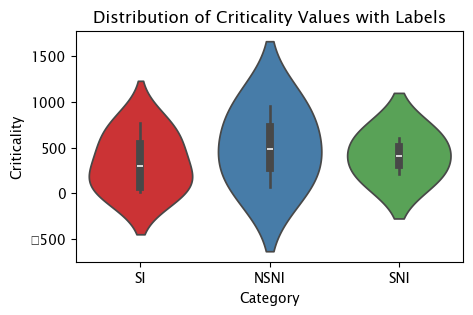

In [253]:


# Create DataFrame for plotting
df = pd.DataFrame({'Criticality': aall_criticality, 'Category': labeels})

# Plot the results
plt.figure(figsize=(5, 3))
sns.violinplot(x='Category', y='Criticality', data=df, palette='Set1')
plt.title('Distribution of Criticality Values with Labels')
plt.xlabel('Category')
plt.ylabel('Criticality')

plt.savefig('violin plot with labels randomly assgined criticalityy, levels')

plt.show()



C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\1651771125.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='Category', y='Criticality', data=df1, palette='Set1')
C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\1651771125.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Lucida Sans.
  plt.tight_layout()


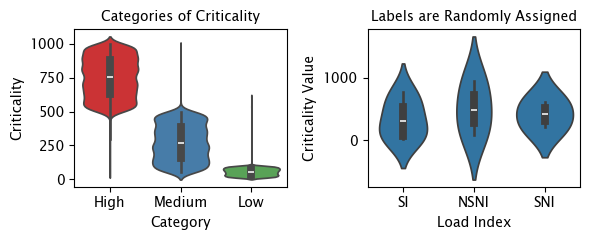

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font family to Lucida Sans
rcParams['font.family'] = 'Lucida Sans'

# Create DataFrames for the plots
df1 = pd.DataFrame({'Criticality': all_criticalities, 'Category': all_labels})
df2 = pd.DataFrame({'Load': labeels, 'Criticality': aall_criticality})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))  # 1 row, 2 columns

# Plot 1: Distribution of Criticality Values by Category
sns.violinplot(ax=axes[0], x='Category', y='Criticality', data=df1, palette='Set1')
axes[0].set_title('Categories of Criticality', fontsize=10) 
axes[0].set_xlabel('Category', fontsize=10)  
axes[0].set_ylabel('Criticality', fontsize=10) 

# Plot 2: Distribution of Criticality for Simulation 1000
sns.violinplot(ax=axes[1], x='Load', y='Criticality', data=df2)
axes[1].set_title('Labels are Randomly Assigned', fontsize=10)  
axes[1].set_xlabel('Load Index', fontsize=10)  
axes[1].set_ylabel('Criticality Value', fontsize=10) 

# Adjust layout
plt.tight_layout()

# Saving each plot separately as PDFs
fig.savefig("1 criticality_by_category.pdf") 
plt.savefig("1 criticality_by_load.pdf")  

# Display the combined plot
plt.show()


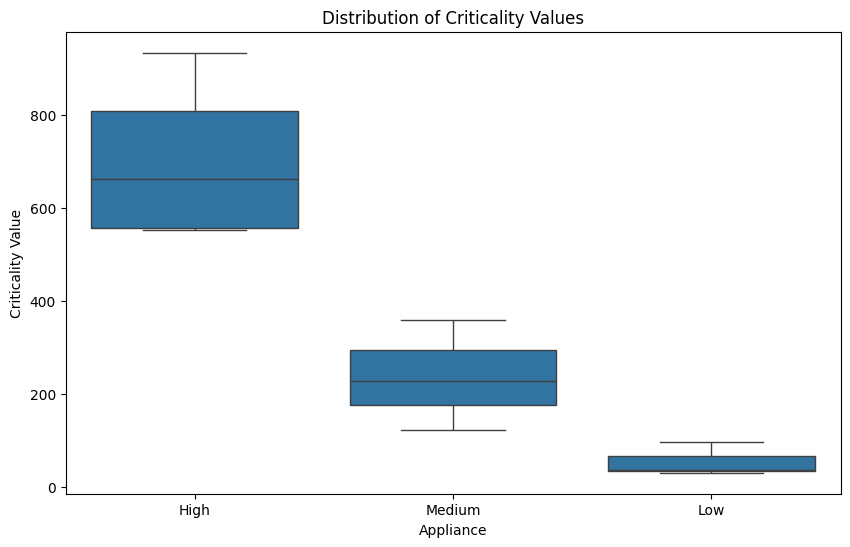

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x=labels, y=criticality) 
plt.xlabel("Appliance")
plt.ylabel("Criticality Value")
plt.title("Distribution of Criticality Values")

# Save the plot (if needed)
plt.savefig("workng_on_criti_plot.png") 

# Display the plot
plt.show()

In [66]:
import numpy as np

def generate_random_powers(num_values=10, num_simulations=1000, min_value=0.5, max_value=1.5):

    power = np.zeros((num_simulations, num_values))

    for i in range(num_simulations):
        possible_values = np.arange(min_value, max_value + 0.1, 0.1)
        power[i, :] = np.random.choice(possible_values, num_values) 
    
    return power

# Generate 10 random values for power rating from 0.5 to 1.5 with 1000 simulations
power_values = generate_random_powers()

# Select results from the last simulation i.e. 999
simulation_index = 999  # Python uses zero-based indexing
powerr = power_values[simulation_index, :] 
powerr = pd.DataFrame(powerr)
print(powerr)



     0
0  0.6
1  1.1
2  1.2
3  0.8
4  0.8
5  0.8
6  0.8
7  0.7
8  1.0
9  1.1


C:\Users\arshid.ali\AppData\Local\Temp\ipykernel_19244\2684514448.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


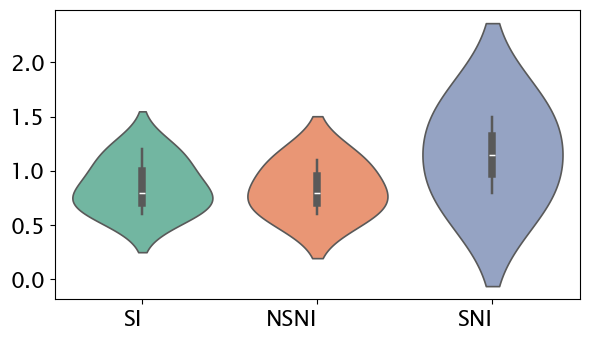

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  font family to Lucida Sans
rcParams['font.family'] = 'Lucida Sans'

# Data generated above

labels = ['SI', 'NSNI', 'SI', 'SI', 'NSNI', 'SNI', 'NSNI', 'SNI', 'SI', 'SI']
power = [0.6, 1.1, 1.2, 0.8, 0.8, 0.8, 0.6, 1.5, 1.0, 0.7]

# Creating the violin plot
plt.figure(figsize=(6, 3.5))  # Adjust figure size

#  plot elements
sns.violinplot(
    x=labels,
    y=power,
    palette="Set2",  
    linewidth=1.2, 
)

# Rotate x-axis labels for readability
plt.xticks(rotation=0, ha="right", fontsize=16)
plt.yticks(fontsize=16)

# Adjust spacing between elements
plt.tight_layout()

# Save the plot (optional)
plt.savefig("1 power_distribution.pdf")

# Display the plot
plt.show()
